In [71]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math
import xarray as xr
import netCDF4 as nc
from matplotlib import ticker, cm
from matplotlib import animation, rc
import matplotlib.tri as tri
import sys
#import metpy.calc as mpcalc
#from metpy.cbook import get_test_data
#from metpy.interpolate import cross_section
import scipy.ndimage as ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.setrecursionlimit(9000)
import scipy.ndimage
import statistics
import scipy.io
import h5py
from scipy.interpolate import griddata

In [72]:
# Change this part
sYear  = 2008
sMonth = 10
sDay   = 1
sHour  = 0
eYear  = 2008
eMonth = 10
eDay   = 7
eHour  = 0

In [73]:
SP_Case = 'SP_newsst_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_32_x_120z1200m.5s_crm_nx_rad_16_np_768_nlev_125.frontera'
SP_PATH = '/media/liran/PLR5/Frontera_newSSTruns/SP/'
SP2008 = xr.open_mfdataset(SP_PATH+SP_Case+'.cam.h0.*.nc')

In [74]:
UP_Case = 'UP_newsst_long_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_64_x_120z200m.0.5s_crm_nx_rad_16_np_768_nlev_125.frontera'
UP_PATH = '/media/liran/PLR5/Frontera_newSSTruns/UP/'
UP2008 = xr.open_mfdataset(UP_PATH+UP_Case+'.cam.h0.2008-10-*.nc')

In [78]:
UPsedi15_PATH = '/media/liran/PLR5/Frontera_newSSTruns/UPhysedi15/'
UPhysedi15 = xr.open_mfdataset(UPsedi15_PATH+'HPhyper_sedi15_long_newsst_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_64_x_120z200m.0.5s_crm_nx_rad_16_np_768_nlev_125.frontera.cam.h0.*.nc')

In [79]:
UPsedi12_PATH = '/media/liran/PLR5/Frontera_newSSTruns/UPhysedi12/'
UPhysedi12 = xr.open_mfdataset(UPsedi12_PATH+'HPhyper_sedi12_long_newsst_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_64_x_120z200m.0.5s_crm_nx_rad_16_np_768_nlev_125.frontera.cam.h0.*.nc')

In [76]:
UPsedi17_PATH = '/media/liran/PLR5/Frontera_newSSTruns/UPhysedi17/'
UPhysedi17 = xr.open_mfdataset(UPsedi17_PATH+'HPhyper_sedi17_long_newsst_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_64_x_120z200m.0.5s_crm_nx_rad_16_np_768_nlev_125.frontera.cam.h0.*.nc')

In [77]:
UPhy_PATH = '/media/liran/PLR5/Frontera_newSSTruns/UPhy/'
UPhy2008 = xr.open_mfdataset(UPhy_PATH+'HPhyper_newsst_L125_ERA5_2008_F-MMF1_frontera_ne16pg2_r05_oQU240_CRM1_64_x_120z200m.0.5s_crm_nx_rad_16_np_768_nlev_125.frontera.cam.h0.2008-10-*.nc')

In [80]:
lon = SP2008.lon.isel(time=0).values
lat = SP2008.lat.isel(time=0).values
Z3 = SP2008.Z3.isel(time=0).values

In [81]:
# Function calculate the distance between two points
def distance2(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [82]:
def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]

In [83]:
# Function calculate the distance between two points
def distancef(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [84]:
# Function determine if the points (lon,lat) is inside a square region
def lonlat_in(lat, lon, lat1, lon1, lat2, lon2):
    flag = 0
    if lon >lon1:
        if lon <lon2:
            if lat >lat1:
                if lat <lat2:
                    flag = 1
    return flag

In [85]:
# Function calculate the potential temperature
def potential_temperature(Temperature_K,Pressure_Pa):
    kapa = 0.286
    P0 = 100000
    return Temperature_K*(P0/Pressure_Pa)**kapa

In [86]:
#  ======================================================
OCNFRAC = UPhysedi12.OCNFRAC.isel(time=0).values

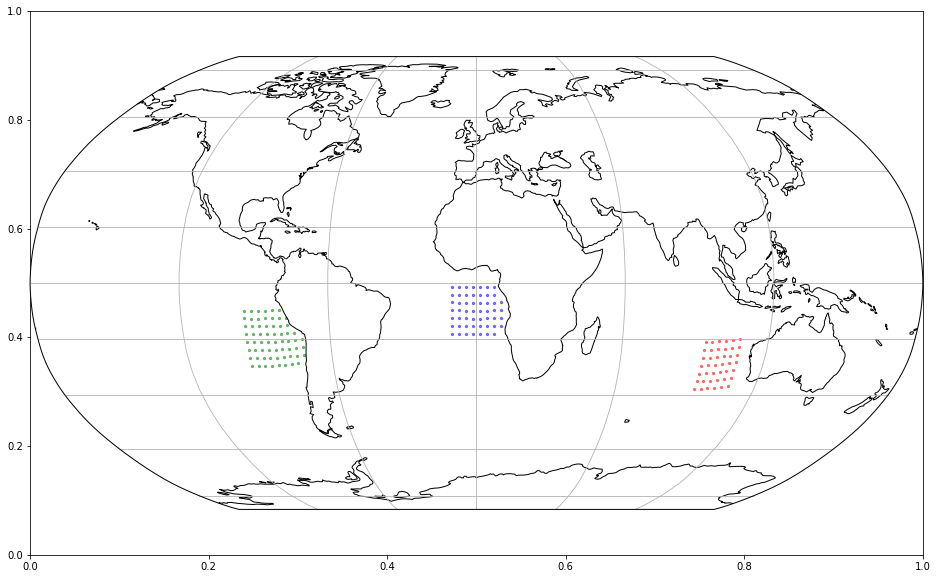

In [87]:
# Check the location of the selected column
#-- create figure and axes object
fig, ax = plt.subplots(figsize=(16,10))

#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()

ind_Namibian = [-999]        
for il in range(len(lon)):
    d0 = lonlat_in(lat[il], lon[il],-20,0,0,20) # Namibian
    if OCNFRAC[il]>0.95:
        if d0>0:
            ind_Namibian.append(il)
            plt.scatter(lon[il], lat[il],
                        color="blue",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important
    d0 = lonlat_in(lat[il], lon[il],-20,350,0,360) # Namibian
    if OCNFRAC[il]>0.95:
        if d0>0:
            ind_Namibian.append(il)
            plt.scatter(lon[il], lat[il],
                        color="blue",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important

ind_Peruvian = [-999]
for il in range(len(lon)):
    d0 = lonlat_in(lat[il], lon[il],-30,265,-8,290) # Peruvian
    if OCNFRAC[il]>0.5:
        if d0>0:
            ind_Peruvian.append(il)
            plt.scatter(lon[il], lat[il],
                        color="green",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important

ind_Australian = [-999]
for il in range(len(lon)):
    d0 = lonlat_in(lat[il], lon[il],-39,94,-20,109) # Australian
    if d0>0:
        ind_Australian.append(il)
        plt.scatter(lon[il], lat[il],
                    color="red",
                    s=5,
                    alpha=0.5,
                    transform=ccrs.PlateCarree()) ## Important
        
        

plt.savefig('Ocean_Land_Namibian_Peruvian_Australian_Model.png')

In [88]:
ind_Peruvian = ind_Peruvian[1:]
ind_Namibian = ind_Namibian[1:]
ind_Australian = ind_Australian[1:]

In [89]:
CERES_PATH = '/media/liran/Elements/CERES/'
count = 0
ndays = 7
iy = 2008
CERES_FAME = 'CERES_SYN1deg-Day_Terra-Aqua-MODIS_Ed4.1_Subset_'+str(iy)+'1001-'+str(iy)+'1130.nc'
CERES_FILE = nc.Dataset(CERES_PATH+CERES_FAME, mode = 'r')
toa_sw_all_daily = CERES_FILE.variables['toa_sw_all_daily']
toa_lw_all_daily = CERES_FILE.variables['toa_lw_all_daily']
toa_solar_all_daily = CERES_FILE.variables['toa_solar_all_daily']
if count ==0: 
    fsntoa_obs      = toa_solar_all_daily[sDay-1:sDay-1+ndays,:,:]-toa_sw_all_daily[sDay-1:sDay-1+ndays,:,:]
    toa_lw_obs      = toa_lw_all_daily[sDay-1:sDay-1+ndays,:,:]
else:
    work1           = toa_solar_all_daily[sDay-1:sDay-1+ndays,:,:]-toa_sw_all_daily[sDay-1:sDay-1+ndays,:,:]
    work2           = toa_lw_all_daily[sDay-1:sDay-1+ndays,:,:]
    fsntoa_obs      = fsntoa_obs+work1
    toa_lw_obs      = toa_lw_obs+work2
print(count)
fsntoa_obs = fsntoa_obs
toa_lw_obs = toa_lw_obs
fsntoa_obs_mean = np.mean(fsntoa_obs, axis=0)
toa_lw_obs_mean = np.mean(toa_lw_obs, axis=0)
# Read coordinates
lon_CERES  = CERES_FILE.variables['lon'] # 360
lat_CERES  = CERES_FILE.variables['lat'] # 180
time_CERES = CERES_FILE.variables['time']

0


/home/liran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  # This is added back by InteractiveShellApp.init_path()
/home/liran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  # This is added back by InteractiveShellApp.init_path()
/home/liran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  if sys.path[0] == '':
/home/liran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  if sys.path[0] == '':


In [90]:
# ERA5 data  ---------------------------------------------------------------------------------------------------
iy = 2008
ndays = 7
sDay = 1
eDay = 7
ERA5_Path = '/media/liran/PLR5/ERA5/'+str(iy)+'/'
ERA5_Ensemblelcc = np.zeros([7,24,721,1440])
ERA5_Ensemblelwp = np.zeros([7,24,721,1440])
for id in range(sDay,eDay+1,1):
    ERA5_files = xr.open_mfdataset(ERA5_Path+'ERA5_sfc_'+str(iy)+'10'+str(id).zfill(2)+'.nc')
    ERA5_hourly = ERA5_files.variables['lcc']
    ERA5_hourly2 = ERA5_files.variables['tclw']
    ERA5_Ensemblelcc[id-1,:,:,:] = ERA5_hourly
    ERA5_Ensemblelwp[id-1,:,:,:] = ERA5_hourly2

lon_ERA5  = ERA5_files.variables['longitude'] # 360
lat_ERA5  = ERA5_files.variables['latitude'] # 180Multi-CRM_Aqua_UPCTRL5_1month_frontera_ne16pg2_ne16pg2_CRM1_64_125z_200m.0.5s_crm_nx_rad_16_np_2048_nlev_125.frontera
xi = lon_ERA5[:]
yi = lat_ERA5[:]
XiERA5, YiERA5 = np.meshgrid(lon_ERA5, lat_ERA5)
XiERA5_1d = XiERA5.flatten()
YiERA5_1d = YiERA5.flatten()

ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/ERA5_sfc_landseamask.nc')
ERA5_lsm = np.array(ERA5_plfiles.isel(time=0).variables['lsm'])
ERA5_lsm_1d = ERA5_lsm.flatten()
ERA5_lsm.shape
ERA5_lsm_1d.shape

(1038240,)

In [91]:
# Read coordinates
points6 = np.zeros([6144, 2])
points6[:,0] = lon
points6[:,1] = lat
xi = lon_CERES[:]
yi = lat_CERES[:]
Xi, Yi = np.meshgrid(lon_CERES, lat_CERES)

In [93]:
hstart = 1
totaltime = 144*ndays
hend   = totaltime
UP_Ensemble    = np.zeros([1,6144])
SP_Ensemble    = np.zeros([1,6144])
UPhy_Ensemble  = np.zeros([1,6144])
UPhys12_Ensemble  = np.zeros([1,6144])
UPhys15_Ensemble  = np.zeros([1,6144])
UPhys17_Ensemble  = np.zeros([1,6144])

UP_Ensemble_ASR    = np.zeros([1,6144])
SP_Ensemble_ASR    = np.zeros([1,6144])
UPhy_Ensemble_ASR  = np.zeros([1,6144])
UPhys12_Ensemble_ASR  = np.zeros([1,6144])
UPhys15_Ensemble_ASR  = np.zeros([1,6144])
UPhys17_Ensemble_ASR  = np.zeros([1,6144])

UP2008_FSNTOA                 = UP2008.variables['FSNTOA'] 
SP2008_FSNTOA                 = SP2008.variables['FSNTOA'] 
UPhy2008_FSNTOA               = UPhy2008.variables['FSNTOA'] 
UPhys12_2008_FSNTOA           = UPhysedi12.variables['FSNTOA']
UPhys15_2008_FSNTOA           = UPhysedi15.variables['FSNTOA']
UPhys17_2008_FSNTOA           = UPhysedi17.variables['FSNTOA']
UP_Ensemble[0,:] = np.mean(UP2008_FSNTOA[hstart-1:hend-1,:], axis=0)
SP_Ensemble[0,:] = np.mean(SP2008_FSNTOA[hstart-1:hend-1,:], axis=0)
UPhy_Ensemble[0,:] = np.mean(UPhy2008_FSNTOA[hstart-1:hend-1,:], axis=0)
UPhys12_Ensemble[0,:] = np.mean(UPhys12_2008_FSNTOA[hstart-1:hend-1,:], axis=0)
UPhys15_Ensemble[0,:] = np.mean(UPhys15_2008_FSNTOA[hstart-1:hend-1,:], axis=0)
UPhys17_Ensemble[0,:] = np.mean(UPhys17_2008_FSNTOA[hstart-1:hend-1,:], axis=0)
UP2008_SOLIN                 = UP2008.variables['SOLIN'] 
SP2008_SOLIN                 = SP2008.variables['SOLIN'] 
UPhy2008_SOLIN               = UPhy2008.variables['SOLIN'] 
UPhys12_2008_SOLIN           = UPhysedi12.variables['SOLIN']
UPhys15_2008_SOLIN           = UPhysedi15.variables['SOLIN']
UPhys17_2008_SOLIN           = UPhysedi17.variables['SOLIN']
UP_Ensemble_ASR[0,:] = UP_Ensemble[0,:]
SP_Ensemble_ASR[0,:] = SP_Ensemble[0,:]
UPhy_Ensemble_ASR[0,:] = UPhy_Ensemble[0,:]
UPhys12_Ensemble_ASR[0,:] = UPhys12_Ensemble[0,:]
UPhys15_Ensemble_ASR[0,:] = UPhys15_Ensemble[0,:]
UPhys17_Ensemble_ASR[0,:] = UPhys17_Ensemble[0,:]

In [94]:
UP_Ensemble_FLNT    = np.zeros([1,6144])
SP_Ensemble_FLNT    = np.zeros([1,6144])
UPhy_Ensemble_FLNT  = np.zeros([1,6144])
UPhys12_Ensemble_FLNT  = np.zeros([1,6144])
UPhys15_Ensemble_FLNT  = np.zeros([1,6144])
UPhys17_Ensemble_FLNT  = np.zeros([1,6144])
UP2008_FLNT                 = UP2008.variables['FLNT'] 
SP2008_FLNT                 = SP2008.variables['FLNT'] 
UPhy2008_FLNT               = UPhy2008.variables['FLNT'] 
UPhys12_2008_FLNT           = UPhysedi12.variables['FLNT']
UPhys15_2008_FLNT           = UPhysedi15.variables['FLNT']
UPhys17_2008_FLNT           = UPhysedi17.variables['FLNT']
UP_Ensemble_FLNT[0,:] = np.mean(UP2008_FLNT[hstart-1:hend-1,:], axis=0)
SP_Ensemble_FLNT[0,:] = np.mean(SP2008_FLNT[hstart-1:hend-1,:], axis=0)
UPhy_Ensemble_FLNT[0,:] = np.mean(UPhy2008_FLNT[hstart-1:hend-1,:], axis=0)
UPhys12_Ensemble_FLNT[0,:] = np.mean(UPhys12_2008_FLNT[hstart-1:hend-1,:], axis=0)
UPhys15_Ensemble_FLNT[0,:] = np.mean(UPhys15_2008_FLNT[hstart-1:hend-1,:], axis=0)
UPhys17_Ensemble_FLNT[0,:] = np.mean(UPhys17_2008_FLNT[hstart-1:hend-1,:], axis=0)

In [95]:
#<<<<<<<<
UPFSNTOA_Ensemble_standard        = np.mean(UP_Ensemble_ASR, axis=0)
SPFSNTOA_Ensemble_standard        = np.mean(SP_Ensemble_ASR, axis=0)
UPhyFSNTOA_Ensemble_standard      = np.mean(UPhy_Ensemble_ASR, axis=0)
UPhys12_Ensemble_standard     = np.mean(UPhys12_Ensemble_ASR, axis=0)
UPhys15_Ensemble_standard     = np.mean(UPhys15_Ensemble_ASR, axis=0)
UPhys17_Ensemble_standard     = np.mean(UPhys17_Ensemble_ASR, axis=0)
UPFSNTOA_Ensemble_standardi  = griddata(points6,UPFSNTOA_Ensemble_standard[:], (Xi, Yi), method='nearest')
SPFSNTOA_Ensemble_standardi  = griddata(points6,SPFSNTOA_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhyFSNTOA_Ensemble_standardi  = griddata(points6,UPhyFSNTOA_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys12_Ensemble_standardi  = griddata(points6,UPhys12_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys15_Ensemble_standardi  = griddata(points6,UPhys15_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys17_Ensemble_standardi  = griddata(points6,UPhys17_Ensemble_standard[:], (Xi, Yi), method='nearest')

In [96]:
 #<<<<<<<<
UPFLNT_Ensemble_standard        = np.mean(UP_Ensemble_FLNT, axis=0)
SPFLNT_Ensemble_standard        = np.mean(SP_Ensemble_FLNT, axis=0)
UPhyFLNT_Ensemble_standard      = np.mean(UPhy_Ensemble_FLNT, axis=0)
UPhys12_Ensemble_standard     = np.mean(UPhys12_Ensemble_FLNT, axis=0)
UPhys15_Ensemble_standard     = np.mean(UPhys15_Ensemble_FLNT, axis=0)
UPhys17_Ensemble_standard     = np.mean(UPhys17_Ensemble_FLNT, axis=0)
UPFLNT_Ensemble_standardi  = griddata(points6,UPFLNT_Ensemble_standard[:], (Xi, Yi), method='nearest')
SPFLNT_Ensemble_standardi  = griddata(points6,SPFLNT_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhyFLNT_Ensemble_standardi  = griddata(points6,UPhyFLNT_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys12FLNT_Ensemble_standardi  = griddata(points6,UPhys12_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys15FLNT_Ensemble_standardi  = griddata(points6,UPhys15_Ensemble_standard[:], (Xi, Yi), method='nearest')
UPhys17FLNT_Ensemble_standardi  = griddata(points6,UPhys17_Ensemble_standard[:], (Xi, Yi), method='nearest')

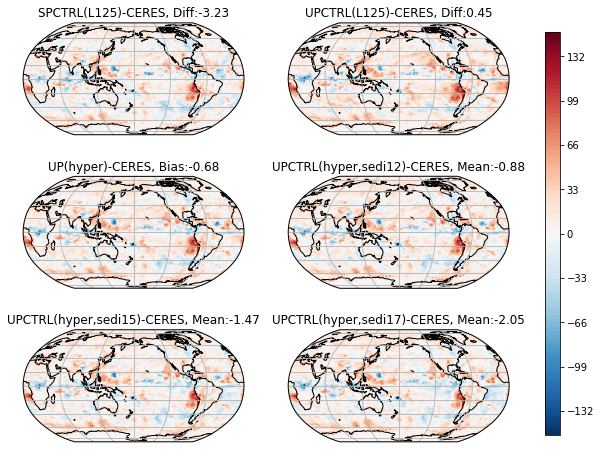

In [97]:
# Compare the Low cloud fraction
#xi = lon_ERA5[:]+180
#yi = lat_ERA5[:]
xi = lon_CERES[:]+180
yi = lat_CERES[:]
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 1, 101)
levels2 = np.linspace(-150.0, 150.0, 101)
levels3 = np.linspace(-60,60, 101)
# --------------------
ax2 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, SPFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb2 = fig.colorbar(cntr2, ax=ax2,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb2.locator = tick_locator
cb2.update_ticks()
title2 = 'SPCTRL(L125)-CERES, Diff:'+'{:.2f}'
ax2.set_title(title2.format(np.mean(SPFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))
# --------------------
ax2 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, UPFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb2 = fig.colorbar(cntr2, ax=ax2,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb2.locator = tick_locator
cb2.update_ticks()
title2 = 'UPCTRL(L125)-CERES, Diff:'+'{:.2f}'
ax2.set_title(title2.format(np.mean(UPFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))
# --------------------
ax6 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax6.coastlines()
ax6.gridlines()
cntr6=ax6.contourf(xi, yi, UPhyFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb6 = fig.colorbar(cntr6, ax=ax6,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb6.locator = tick_locator
cb6.update_ticks()
title6 = 'UP(hyper)-CERES, Bias:'+'{:.2f}'
ax6.set_title(title6.format(np.mean(UPhyFSNTOA_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))
# --------------------
ax55 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax55.set_global()
#-- add coastlines, country border lines, and grid lines
ax55.coastlines()
ax55.gridlines()
cntr55=ax55.contourf(xi, yi, UPhys12_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb55 = fig.colorbar(cntr55, ax=ax55,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb55.locator = tick_locator
cb55.update_ticks()
#ax55.plot([lon_CERES[minindexlon1],lon_CERES[minindexlon2]],[lat_CERES[minindexlat1],lat_CERES[minindexlat2]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon1],lon_CERES[minindexlon3]],[lat_CERES[minindexlat1],lat_CERES[minindexlat3]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon2],lon_CERES[minindexlon4]],[lat_CERES[minindexlat2],lat_CERES[minindexlat4]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon3],lon_CERES[minindexlon4]],[lat_CERES[minindexlat3],lat_CERES[minindexlat4]],transform=ccrs.PlateCarree())
title55 = 'UPCTRL(hyper,sedi12)-CERES, Mean:'+'{:.2f}'
ax55.set_title(title55.format(np.mean(UPhys12_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))

# --------------------
ax55 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax55.set_global()
#-- add coastlines, country border lines, and grid lines
ax55.coastlines()
ax55.gridlines()
cntr55=ax55.contourf(xi, yi, UPhys17_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb55 = fig.colorbar(cntr55, ax=ax55,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb55.locator = tick_locator
cb55.update_ticks()
title55 = 'UPCTRL(hyper,sedi17)-CERES, Mean:'+'{:.2f}'
ax55.set_title(title55.format(np.mean(UPhys17_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))

# --------------------
ax551 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax551.set_global()
#-- add coastlines, country border lines, and grid lines
ax551.coastlines()
ax551.gridlines()
cntr551=ax551.contourf(xi, yi, UPhys15_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb551 = fig.colorbar(cntr551, ax=ax551,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
cb551.locator = tick_locator
cb551.update_ticks()
title551 = 'UPCTRL(hyper,sedi15)-CERES, Mean:'+'{:.2f}'
ax551.set_title(title551.format(np.mean(UPhys15_Ensemble_standardi[:,:]-fsntoa_obs_mean[:,:])))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cntr551, cax=cbar_ax)


plt.savefig('2008_new_sstFSNTOAdiffCERES_hypersedi_day0To7.png')

plt.show()

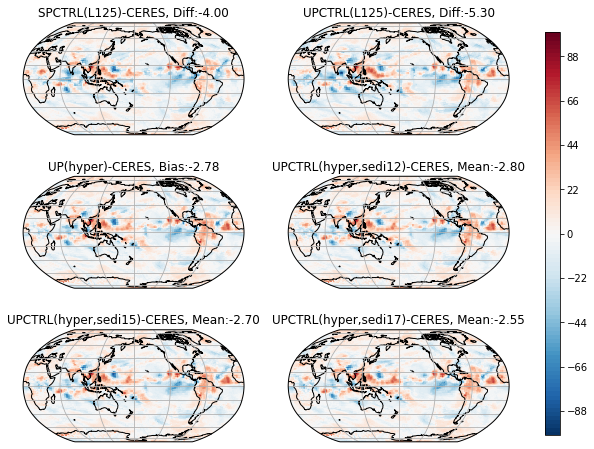

In [103]:
# Compare the Low cloud fraction
#xi = lon_ERA5[:]+180
#yi = lat_ERA5[:]
xi = lon_CERES[:]+180
yi = lat_CERES[:]
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
levels = np.linspace(0, 1, 101)
levels2 = np.linspace(-100.0, 100.0, 101)
levels3 = np.linspace(-60,60, 101)
# --------------------
ax2 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=180.0))
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, SPFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb2 = fig.colorbar(cntr2, ax=ax2,orientation = 'horizontal')
#tick_locator = ticker.MaxNLocator(nbins = 9)
#cb2.locator = tick_locator
#cb2.update_ticks()
title2 = 'SPCTRL(L125)-CERES, Diff:'+'{:.2f}'
ax2.set_title(title2.format(np.mean(SPFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))
# --------------------
ax2 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=180.0))
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, UPFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb2 = fig.colorbar(cntr2, ax=ax2,orientation = 'horizontal')
#tick_locator = ticker.MaxNLocator(nbins = 9)
#cb2.locator = tick_locator
#cb2.update_ticks()
title2 = 'UPCTRL(L125)-CERES, Diff:'+'{:.2f}'
ax2.set_title(title2.format(np.mean(UPFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))
# --------------------
ax6 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=180.0))
ax6.coastlines()
ax6.gridlines()
cntr6=ax6.contourf(xi, yi, UPhyFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb6 = fig.colorbar(cntr6, ax=ax6,orientation = 'horizontal')
#tick_locator = ticker.MaxNLocator(nbins = 9)
#cb6.locator = tick_locator
#cb6.update_ticks()
title6 = 'UP(hyper)-CERES, Bias:'+'{:.2f}'
ax6.set_title(title6.format(np.mean(UPhyFLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))
# --------------------
ax55 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=180.0))
ax55.set_global()
#-- add coastlines, country border lines, and grid lines
ax55.coastlines()
ax55.gridlines()
cntr55=ax55.contourf(xi, yi, UPhys12FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb55 = fig.colorbar(cntr55, ax=ax55,orientation = 'horizontal')
tick_locator = ticker.MaxNLocator(nbins = 9)
#cb55.locator = tick_locator
#cb55.update_ticks()
#ax55.plot([lon_CERES[minindexlon1],lon_CERES[minindexlon2]],[lat_CERES[minindexlat1],lat_CERES[minindexlat2]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon1],lon_CERES[minindexlon3]],[lat_CERES[minindexlat1],lat_CERES[minindexlat3]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon2],lon_CERES[minindexlon4]],[lat_CERES[minindexlat2],lat_CERES[minindexlat4]],transform=ccrs.PlateCarree())
#ax55.plot([lon_CERES[minindexlon3],lon_CERES[minindexlon4]],[lat_CERES[minindexlat3],lat_CERES[minindexlat4]],transform=ccrs.PlateCarree())
title55 = 'UPCTRL(hyper,sedi12)-CERES, Mean:'+'{:.2f}'
ax55.set_title(title55.format(np.mean(UPhys12FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))

# --------------------
ax55 = fig.add_subplot(3,2,6, projection=ccrs.Robinson(central_longitude=180.0))
ax55.set_global()
#-- add coastlines, country border lines, and grid lines
ax55.coastlines()
ax55.gridlines()
cntr55=ax55.contourf(xi, yi, UPhys17FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb55 = fig.colorbar(cntr55, ax=ax55,orientation = 'horizontal')
#tick_locator = ticker.MaxNLocator(nbins = 9)
#cb55.locator = tick_locator
#cb55.update_ticks()
title55 = 'UPCTRL(hyper,sedi17)-CERES, Mean:'+'{:.2f}'
ax55.set_title(title55.format(np.mean(UPhys17FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))

# --------------------
ax551 = fig.add_subplot(3,2,5, projection=ccrs.Robinson(central_longitude=180.0))
ax551.set_global()
#-- add coastlines, country border lines, and grid lines
ax551.coastlines()
ax551.gridlines()
cntr551=ax551.contourf(xi, yi, UPhys15FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:], levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree(central_longitude=180.0))
#cb551 = fig.colorbar(cntr551, ax=ax551,orientation = 'horizontal')
#tick_locator = ticker.MaxNLocator(nbins = 9)
#cb551.locator = tick_locator
#cb551.update_ticks()
title551 = 'UPCTRL(hyper,sedi15)-CERES, Mean:'+'{:.2f}'
ax551.set_title(title551.format(np.mean(UPhys15FLNT_Ensemble_standardi[:,:]-toa_lw_obs_mean[:,:])))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cntr551, cax=cbar_ax)

plt.savefig('2008_newsst_FLNTdiffCERES_hypersedi_day0To7.png')


In [ ]:
numday = 7 # Days
varnames = [ "TS" ,  "SHFLX",  "LHFLX",  "FSNS",  "FLNS",  "TGCLDCWP"]
cminall  = [291.00,        5,       85,       0,      40,           0]
cmaxall  = [292.00,       25,      175,     950,     110,        0.12]
labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]
fig, ax = plt.subplots(len(varnames),1, figsize=(20, 24))
Region_ind = ind_Peruvian
totaltime = 144*numday
time0 = np.linspace(0, totaltime, totaltime)
fcount = 0
for varname in varnames:
    evalstring = "np.squeeze(SP2008."+varname+".values)"
    SP = eval(evalstring)
    evalstring = "np.squeeze(UP2008."+varname+".values)"
    UP = eval(evalstring)
    evalstring = "np.squeeze(UPhy2008."+varname+".values)"
    UPhy = eval(evalstring)
    evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
    UPhysedi12a = eval(evalstring)
    evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
    UPhysedi15a = eval(evalstring)
    evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
    UPhysedi17a = eval(evalstring)
    ccount = 0
    SPavg = np.zeros([totaltime])
    UPavg = np.zeros([totaltime])
    UPhyavg = np.zeros([totaltime])
    UPhyavg12 = np.zeros([totaltime])
    UPhyavg15 = np.zeros([totaltime])
    UPhyavg17 = np.zeros([totaltime])
    print(varname)
    for icol in range(len(Region_ind)):
        SPavg[:] = SPavg[:] + SP[0:totaltime,Region_ind[icol]]
        UPavg[:] = UPavg[:] + UP[0:totaltime,Region_ind[icol]]
        UPhyavg[:] = UPhyavg[:] + UPhy[0:totaltime,Region_ind[icol]]
        UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[0:totaltime,Region_ind[icol]]
        UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[0:totaltime,Region_ind[icol]]
        UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[0:totaltime,Region_ind[icol]]
        ccount = ccount + 1
    
    SPavg = SPavg /ccount
    UPavg = UPavg /ccount
    UPhyavg = UPhyavg /ccount
    UPhyavg12 = UPhyavg12 /ccount
    UPhyavg15 = UPhyavg15 /ccount
    UPhyavg17 = UPhyavg17 /ccount
    cf41 = ax[fcount].plot(time0/144,SPavg[0:totaltime], color='orange', label = labeltitle[0])
    cf42 = ax[fcount].plot(time0/144,UPavg[0:totaltime], color='red', label = labeltitle[1])
    cf43 = ax[fcount].plot(time0/144,UPhyavg[0:totaltime], color='magenta', linestyle='dashed', label = labeltitle[2])
    cf44 = ax[fcount].plot(time0/144,UPhyavg12[0:totaltime], color='red', linestyle='dashdot', label = labeltitle[3])
    cf45 = ax[fcount].plot(time0/144,UPhyavg15[0:totaltime], color='green', label = labeltitle[4])
    cf46 = ax[fcount].plot(time0/144,UPhyavg17[0:totaltime], color='blue', label = labeltitle[5])
    ax[fcount].set(xlim=(0, numday), ylim=(cminall[fcount], cmaxall[fcount]))
    if fcount==0:
        ax[fcount].legend(prop ={'size': 10})
    titlestring = (varname)
    tx = ax[fcount].set_title(titlestring, fontsize=20)
    ax[fcount].set_ylabel(varname, fontsize=20)
    fcount = fcount + 1
    
titlefigure = 'Time_TS_SHFLX_LHFLX_FSNS_FLNS_TGCLDCWP.png'
plt.savefig(titlefigure.format(iday))

In [104]:
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_cc.nc')
ERA5_cchourly = ERA5_plfiles.variables['cc']
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_t.nc')
ERA5_thourly = ERA5_plfiles.variables['t']
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_q.nc')
ERA5_qhourly = ERA5_plfiles.variables['q']
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_ciwc.nc')
ERA5_ciwchourly = ERA5_plfiles.variables['ciwc']
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_z.nc')
ERA5_zhourly = ERA5_plfiles.variables['z']
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/2008/ERA5_clwc.nc')
ERA5_clwchourly = ERA5_plfiles.variables['clwc']

In [105]:
ERA5_plfiles = xr.open_mfdataset('/media/liran/PLR5/ERA5/ERA5_sfc_landseamask.nc')
ERA5_lsm = np.array(ERA5_plfiles.isel(time=0).variables['lsm'])
ERA5_lsm_1d = ERA5_lsm.flatten()
ERA5_lsm.shape
ERA5_lsm_1d.shape

(1038240,)

In [106]:
ind_Australian_ERA5 = [-999]
ind_Namibian_ERA5 = [-999] 
ind_Peruvian_ERA5 = [-999]
for il in range(len(XiERA5_1d)):
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-39,94,-20,109) # Australian
    if d0>0:
        ind_Australian_ERA5.append(il)
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-20,0,0,20) # Namibian
    if ERA5_lsm_1d[il]<0.05:
        if d0>0:
            ind_Namibian_ERA5.append(il)
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-20,350,0,360) # Namibian
    if ERA5_lsm_1d[il]<0.05:
        if d0>0:
            ind_Namibian_ERA5.append(il)
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-30,265,-8,290) # Peruvian
    if ERA5_lsm_1d[il]<0.05:
        if d0>0:
            ind_Peruvian_ERA5.append(il)

ind_Australian_ERA5 = ind_Australian_ERA5[1:]
ind_Namibian_ERA5 = ind_Namibian_ERA5[1:]
ind_Peruvian_ERA5 = ind_Peruvian_ERA5[1:]

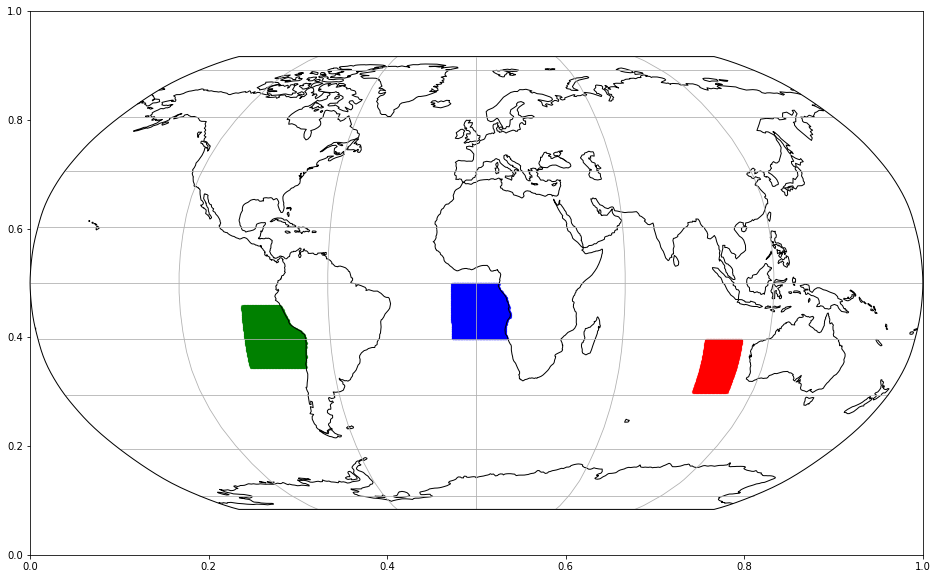

In [107]:
fig, ax = plt.subplots(figsize=(16,10))

#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()
for il in range(len(YiERA5_1d)):
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-39,94,-20,109) # Australian
    if d0>0:
        if ERA5_lsm_1d[il]<0.05:
            plt.scatter(XiERA5_1d[il], YiERA5_1d[il],
                        color="red",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important

for il in range(len(YiERA5_1d)):
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-20,0,0,20) # Namibian
    if d0>0:
        if ERA5_lsm_1d[il]<0.05:
            plt.scatter(XiERA5_1d[il], YiERA5_1d[il],
                        color="blue",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important
        
for il in range(len(YiERA5_1d)):
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-20,350,0,360) # Namibian
    if d0>0:
        if ERA5_lsm_1d[il]<0.05:
            plt.scatter(XiERA5_1d[il], YiERA5_1d[il],
                        color="blue",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important

for il in range(len(YiERA5_1d)):
    d0 = lonlat_in(YiERA5_1d[il], XiERA5_1d[il],-30,265,-8,290) # Peruvian
    if d0>0:
        if ERA5_lsm_1d[il]<0.05:
            plt.scatter(XiERA5_1d[il], YiERA5_1d[il],
                        color="green",
                        s=5,
                        alpha=0.5,
                        transform=ccrs.PlateCarree()) ## Important
plt.savefig('Ocean_Land_Namibian_Peruvian_Australian_ERA5.png')

In [ ]:
numday = 7
zlevel = 125
zzlim = 3000
Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]+"_ERA5"
    Region_ind_ERA5 = eval(evalstring)
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)

    varnames = ["CLDLIQ",   "CLDICE", "CLOUD",         "Q"]
    eranames = [    "lw",       "iw",    "cc",         "q"]
    cminall  = [       0,          0,       0,           0]
    cmaxall  = [    0.12,       0.02,    0.30,        0.01]
    factor   = [    1000,       1000,       1,           1]

    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    countt = 0
    temp3d = np.zeros([16,721,1440])
    temp3d2 = np.zeros([16,721,1440])
    temp3d3 = np.zeros([16,721,1440])
    temp3d4 = np.zeros([16,721,1440])
    temp3d5 = np.zeros([16,721,1440])
    temp3d6 = np.zeros([16,721,1440])
    temp = np.zeros([721,1440])
    temp2 = np.zeros([721,1440])
    temp3 = np.zeros([721,1440])
    temp4 = np.zeros([721,1440])
    temp5 = np.zeros([721,1440])
    temp6 = np.zeros([721,1440])
    ERA5_tRegion = np.zeros([24*numday,16])
    ERA5_qRegion = np.zeros([24*numday,16])
    ERA5_zRegion = np.zeros([24*numday,16])
    ERA5_ccRegion = np.zeros([24*numday,16])
    ERA5_lwRegion = np.zeros([24*numday,16])
    ERA5_iwRegion = np.zeros([24*numday,16])
    ERA_Time = np.zeros([24*numday,16])
    for iday in range(numday):
        print(iday)
        for ihour in range(24):
            temp3d[:,:,:] = ERA5_thourly[countt,:,:]
            temp3d2[:,:,:] = ERA5_zhourly[countt,:,:]
            temp3d3[:,:,:] = ERA5_cchourly[countt,:,:]
            temp3d4[:,:,:] = ERA5_qhourly[countt,:,:]
            temp3d5[:,:,:] = ERA5_clwchourly[countt,:,:]
            temp3d6[:,:,:] = ERA5_ciwchourly[countt,:,:]
            for iz in range(16):
                temp[:,:] = temp3d[iz,:,:]
                temp2[:,:] = temp3d2[iz,:,:]
                temp3[:,:] = temp3d3[iz,:,:]
                temp4[:,:] = temp3d4[iz,:,:]
                temp5[:,:] = temp3d5[iz,:,:]
                temp6[:,:] = temp3d6[iz,:,:]
                temp1d = temp.flatten()
                temp1d2 = temp2.flatten()
                temp1d3 = temp3.flatten()
                temp1d4 = temp4.flatten()
                temp1d5 = temp5.flatten()
                temp1d6 = temp6.flatten()
                counttt3 = 0
                for il in range(len(Region_ind_ERA5)):
                    ERA5_tRegion[countt,iz] = ERA5_tRegion[countt,iz] + temp1d[Region_ind_ERA5[il]]
                    ERA5_zRegion[countt,iz] = ERA5_zRegion[countt,iz] + temp1d2[Region_ind_ERA5[il]]
                    ERA5_ccRegion[countt,iz] = ERA5_ccRegion[countt,iz] + temp1d3[Region_ind_ERA5[il]]
                    ERA5_qRegion[countt,iz] = ERA5_qRegion[countt,iz] + temp1d4[Region_ind_ERA5[il]]
                    ERA5_lwRegion[countt,iz] = ERA5_lwRegion[countt,iz] + temp1d5[Region_ind_ERA5[il]]
                    ERA5_iwRegion[countt,iz] = ERA5_iwRegion[countt,iz] + temp1d6[Region_ind_ERA5[il]]
                    counttt3 = counttt3 + 1        
                ERA5_tRegion[countt,iz] = ERA5_tRegion[countt,iz]/(counttt3+1)
                ERA5_zRegion[countt,iz] = ERA5_zRegion[countt,iz]/(counttt3+1)
                ERA5_ccRegion[countt,iz] = ERA5_ccRegion[countt,iz]/(counttt3+1)
                ERA5_qRegion[countt,iz] = ERA5_qRegion[countt,iz]/(counttt3+1)
                ERA5_lwRegion[countt,iz] = ERA5_lwRegion[countt,iz]/(counttt3+1)
                ERA5_iwRegion[countt,iz] = ERA5_iwRegion[countt,iz]/(counttt3+1)
                ERA_Time[countt,iz] = iday + ihour/24
            countt = countt+1


    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        countday = 0
        cc_crossERA5Region_dm = np.zeros([16])
        q_crossERA5Region_dm = np.zeros([16])
        z_crossERA5Region_dm = np.zeros([16])
        lw_crossERA5Region_dm = np.zeros([16])
        iw_crossERA5Region_dm = np.zeros([16])
        print(iday)
        for ihour in range(24):
            cc_crossERA5Region_dm[:] = cc_crossERA5Region_dm[:] + ERA5_ccRegion[(countday+24*iday),:]
            q_crossERA5Region_dm[:] = q_crossERA5Region_dm[:] + ERA5_qRegion[(countday+24*iday),:]
            z_crossERA5Region_dm[:] = z_crossERA5Region_dm[:] + ERA5_zRegion[(countday+24*iday),:]
            lw_crossERA5Region_dm[:] = lw_crossERA5Region_dm[:] + ERA5_lwRegion[(countday+24*iday),:]
            iw_crossERA5Region_dm[:] = iw_crossERA5Region_dm[:] + ERA5_iwRegion[(countday+24*iday),:]
            countday = countday+1
        print(countday)
        cc_crossERA5Region_dm[:] = cc_crossERA5Region_dm[:]/(countday)
        q_crossERA5Region_dm[:] = q_crossERA5Region_dm[:]/(countday)
        z_crossERA5Region_dm[:] = z_crossERA5Region_dm[:]/(countday)
        lw_crossERA5Region_dm[:] = lw_crossERA5Region_dm[:]/(countday)
        iw_crossERA5Region_dm[:] = iw_crossERA5Region_dm[:]/(countday)

        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            evalstring = eranames[fcount]+"_crossERA5Region_dm"
            ERAvar = eval(evalstring)
            cf40 = ax[fcount].plot(factor[fcount]*ERAvar,z_crossERA5Region_dm/9.8,color='black', label = 'ERA5')

            cf41 = ax[fcount].plot(factor[fcount]*SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(factor[fcount]*UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(factor[fcount]*UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(factor[fcount]*UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(factor[fcount]*UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(factor[fcount]*UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim),xlim=(cminall[fcount], cmaxall[fcount]))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel('Height, m', fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1
        titlefigure = 'ERA5_Vertical_profile_'+Region_LC[iRegion]+'_CLDLIQ_CLDICE_CLOUD_Q_Day'+'{:02d}'+'.png'
        plt.savefig(titlefigure.format(iday))

0
1
2
3
4
5
6
0
24
1
24
2
24
3
24
4
24
5
24
6
24
0
1
2
3
4
5
6
0
24
1
24
2
24
3
24
4
24
5
24
6
24
0
1
2
3
4
5
6
0
24
1
24
2
24
3
24
4
24


In [ ]:
zlevel = 125
zzlim = 3000

Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    varnames = ["CLDLIQ",   "CLDICE", "CLOUD",      "AREL"]
    cminall  = [       0,          0,       0,           0]
    cmaxall  = [    0.12,       0.04,    0.30,        1.00]
    factor   = [    1000,       1000,       1,           1]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            cf41 = ax[fcount].plot(factor[fcount]*SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(factor[fcount]*UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(factor[fcount]*UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(factor[fcount]*UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(factor[fcount]*UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(factor[fcount]*UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim),xlim=(cminall[fcount], cmaxall[fcount]))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel(varname, fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1

        titlefigure = 'Vertical_profile_'+Region_LC[iRegion]+'_CLDLIQ_CLDICE_CLOUD_QTFLX_Day'+'{:02d}'+'.png'
        plt.savefig(titlefigure.format(iday))

In [ ]:
numday = 7 # Days
zlevel = 125
zzlim = 3000
Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    varnames = [ "U",     "WSUB", "RELHUM",     "SPTKES"]
    cminall  = [ -10,          0,        0,            0]
    cmaxall  = [  10,        0.5,       80,        0.125]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            cf41 = ax[fcount].plot(SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim),xlim=(cminall[fcount], cmaxall[fcount]))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel(varname, fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1

        titlefigure = 'Vertical_profile_'+Region_LC[iRegion]+'_U_WSUB_RELHUM_SPTKES_Day'+'{:02d}'+'.png'
        plt.savefig(titlefigure.format(iday))

In [ ]:
numday = 7 # Days
zlevel = 125
zzlim = 3000
Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    
    varnames = ["SPWW","SPTK", "SPTKE",      "SPTKES"]
    cminall  = [   85,          0,       40,           0]
    cmaxall  = [  175,        950,      110,        0.12]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            cf41 = ax[fcount].plot(SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel(varname, fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1

    plt.savefig('Vertical_profile_'+Region_LC[iRegion]+'_SPWW_SPTK_SPTKE_SPTKES.png')

In [ ]:
zlevel = 125
zzlim = 3000
Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    
    varnames = [   "QRL",      "QRS","PTTEND",         "T"]
    cminall  = [   -0.12,          0,   -0.10,         292]
    cmaxall  = [    0.04,       0.06,    0.04,         275]
    factor   = [    1000,       1000,    1000,           1]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            cf41 = ax[fcount].plot(factor[fcount]*SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(factor[fcount]*UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(factor[fcount]*UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(factor[fcount]*UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(factor[fcount]*UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(factor[fcount]*UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim),xlim=(cminall[fcount], cmaxall[fcount]))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel(varname, fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1

        titlefigure = 'Vertical_profile_'+Region_LC[iRegion]+'_QRL_QRS_PTTEND_T_Day'+'{:02d}'+'.png'
        plt.savefig(titlefigure.format(iday))

In [ ]:
zlevel = 125
zzlim = 3000
Region_LC = ["Peruvian","Namibian","Australian"];
for iRegion in range(3):
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    
    varnames = ["WSUB",   "SPMCUP", "SPMCDN",      "SPMC"]
    cminall  = [    85,     -0.003,   -0.003,      -0.005]
    cmaxall  = [   175,      0.009,    0.009,        0.02]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]

    Z3SP          = SP2008.Z3.values
    Z3UP          = UP2008.Z3.values
    Z3UPhy        = UPhy2008.Z3.values
    Z3UPhysedi12  = UPhysedi12.Z3.values
    Z3UPhysedi15  = UPhysedi15.Z3.values
    Z3UPhysedi17  = UPhysedi17.Z3.values

    for iday in range(numday):
        fcount = 0
        fig, ax = plt.subplots(1,len(varnames), figsize=(15, 12))
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            SP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            UP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            UPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            UPhysedi12a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            UPhysedi15a = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            UPhysedi17a = eval(evalstring)

            SPavg = np.zeros([zlevel])
            UPavg = np.zeros([zlevel])
            UPhyavg = np.zeros([zlevel])
            UPhyavg12 = np.zeros([zlevel])
            UPhyavg15 = np.zeros([zlevel])
            UPhyavg17 = np.zeros([zlevel])
            SPavgZ3 = np.zeros([zlevel])
            UPavgZ3 = np.zeros([zlevel])
            UPhyavgZ3 = np.zeros([zlevel])
            UPhyavg12Z3 = np.zeros([zlevel])
            UPhyavg15Z3 = np.zeros([zlevel])
            UPhyavg17Z3 = np.zeros([zlevel])

            ccount = 0
            for isec in range(144):
                for icol in range(len(Region_ind)):
                    SPavg[:] = SPavg[:] + SP[isec+144*iday,:,Region_ind[icol]]
                    UPavg[:] = UPavg[:] + UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg[:] = UPhyavg[:] + UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12[:] = UPhyavg12[:] + UPhysedi12a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15[:] = UPhyavg15[:] + UPhysedi15a[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17[:] = UPhyavg17[:] + UPhysedi17a[isec+144*iday,:,Region_ind[icol]]

                    SPavgZ3[:] = SPavgZ3[:] + Z3SP[isec+144*iday,:,Region_ind[icol]]
                    UPavgZ3[:] = UPavgZ3[:] + Z3UP[isec+144*iday,:,Region_ind[icol]]
                    UPhyavgZ3[:] = UPhyavgZ3[:] + Z3UPhy[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg12Z3[:] = UPhyavg12Z3[:] + Z3UPhysedi12[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg15Z3[:] = UPhyavg15Z3[:] + Z3UPhysedi15[isec+144*iday,:,Region_ind[icol]]
                    UPhyavg17Z3[:] = UPhyavg17Z3[:] + Z3UPhysedi17[isec+144*iday,:,Region_ind[icol]]
                    ccount = ccount + 1

            SPavg = SPavg /ccount
            UPavg = UPavg /ccount
            UPhyavg = UPhyavg /ccount
            UPhyavg12 = UPhyavg12 /ccount
            UPhyavg15 = UPhyavg15 /ccount
            UPhyavg17 = UPhyavg17 /ccount

            SPavgZ3 = SPavgZ3 /ccount
            UPavgZ3 = UPavgZ3 /ccount
            UPhyavgZ3 = UPhyavgZ3 /ccount
            UPhyavg12Z3 = UPhyavg12Z3 /ccount
            UPhyavg15Z3 = UPhyavg15Z3 /ccount
            UPhyavg17Z3 = UPhyavg17Z3 /ccount

            cf41 = ax[fcount].plot(SPavg, SPavgZ3,color='orange', label = labeltitle[0])
            cf42 = ax[fcount].plot(UPavg, UPavgZ3,color='red', label = labeltitle[1])
            cf43 = ax[fcount].plot(UPhyavg, UPhyavgZ3,color='magenta', linestyle='dashed', label = labeltitle[2])
            cf44 = ax[fcount].plot(UPhyavg12, UPhyavg12Z3,color='red', linestyle='dashdot', label = labeltitle[3])
            cf45 = ax[fcount].plot(UPhyavg15, UPhyavg15Z3,color='green', label = labeltitle[4])
            cf46 = ax[fcount].plot(UPhyavg17, UPhyavg17Z3,color='blue', label = labeltitle[5])
            ax[fcount].set(ylim=(0, zzlim),xlim=(cminall[fcount], cmaxall[fcount]))
            if fcount==0:
                ax[fcount].legend(prop ={'size': 10})
                ax[fcount].set_ylabel(varname, fontsize=20)
            titlestring = (varname)
            tx = ax[fcount].set_title(titlestring, fontsize=20)
            fcount = fcount + 1

        titlefigure = 'Vertical_profile_'+Region_LC[iRegion]+'_WSUB_SPMCUP_SPMCDN_SPMC_Day'+'{:02d}'+'.png'
        plt.savefig(titlefigure.format(iday))

In [ ]:
Region_LC = ["Peruvian","Namibian","Australian"];
numtime_total = 144*numday+1
for iRegion in range(3):
    
    evalstring = "ind_"+Region_LC[iRegion]
    Region_ind = eval(evalstring)
    varnames = ["CLDLIQ",        "T", "CLOUD",         "Q"]
    cminall  = [       0,          0,       0,           0]
    cmaxall  = [    0.12,       0.04,    0.30,        1.00]
    labeltitle = ["SP","UP","UPhy","UPhysedi12","UPhysedi15","UPhysedi17"]
    
    model_SPRegion = np.zeros([numtime_total,125])
    model_UPRegion = np.zeros([numtime_total,125])
    model_UPhyRegion = np.zeros([numtime_total,125])
    model_UPhysedi12Region = np.zeros([numtime_total,125])
    model_UPhysedi15Region = np.zeros([numtime_total,125])
    model_UPhysedi17Region = np.zeros([numtime_total,125])
    for it in range(numtime_total):
        for varname in varnames:
            evalstring = "np.squeeze(SP2008."+varname+".values)"
            modelSP = eval(evalstring)
            evalstring = "np.squeeze(UP2008."+varname+".values)"
            modelUP = eval(evalstring)
            evalstring = "np.squeeze(UPhy2008."+varname+".values)"
            modelUPhy = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi12."+varname+".values)"
            modelUPhysedi12 = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi15."+varname+".values)"
            modelUPhysedi15 = eval(evalstring)
            evalstring = "np.squeeze(UPhysedi17."+varname+".values)"
            modelUPhysedi17 = eval(evalstring)
            count = 0
            for il in range(len(Region_ind)):
                model_SPRegion[it,:] = model_SPRegion[it,:] + modelSP[it,:,ind_Region[il]]
                model_UPRegion[it,:] = model_UPRegion[it,:] + modelUP[it,:,ind_Region[il]]
                model_UPhyRegion[it,:] = model_UPhyRegion[it,:] + modelUPhy[it,:,ind_Region[il]]
                model_UPhysedi15Region[it,:] = model_UPhysedi15Region[it,:] + modelUPhysedi15[it,:,ind_Region[il]]
                model_UPhysedi17Region[it,:] = model_UPhysedi17Region[it,:] + modelUPhysedi17[it,:,ind_Region[il]]
                model_UPhysedi12Region[it,:] = model_UPhysedi12Region[it,:] + modelUPhysedi12[it,:,ind_Region[il]]
                count = count + 1
            model_SPRegion[it,:] = model_SPRegion[it,:] /count
            model_UPRegion[it,:] = model_UPRegion[it,:]  /count
            model_UPhyRegion[it,:] = model_UPhyRegion[it,:] /count
            model_UPhysedi15Region[it,:] = model_UPhysedi15Region[it,:] /count
            model_UPhysedi17Region[it,:] = model_UPhysedi17Region[it,:] /count
            model_UPhysedi12Region[it,:] = model_UPhysedi12Region[it,:] /count

        model_crossSPRegion = np.transpose(model_SPRegion)
        model_crossUPRegion = np.transpose(model_UPRegion)
        model_crossUPhyRegion = np.transpose(model_UPhyRegion)
        model_crossUPhysedi15Region = np.transpose(model_UPhysedi15Region)
        model_crossUPhysedi17Region = np.transpose(model_UPhysedi17Region)
        model_crossUPhysedi12Region = np.transpose(model_UPhysedi12Region)

    #  For SPCTRL and UPCTRL, both finished 5 day simulation
        fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1, figsize=(20, 24))
        varmin = [0]
        varmax = [0.0002]
        varinter = [101]
        vardmin = [-4]
        vardmax = [4]
        vardinter = [101]
        num1 = 1009
        num2 = 1009
        time0 = np.linspace(0, num1, num1)
        time2 = np.linspace(0, num2, num2)
        time1 = np.zeros([1009,125])
        for it in range(125):
            time1[:,it] = time0
        time = np.transpose(time1)
        levels = np.linspace(varmin[0], varmax[0], varinter[0])
        levels2 = np.linspace(vardmin[0], vardmax[0], vardinter[0])

        cf = ax1.contourf(time/144,Z3_crossSPRegion,model_crossSPRegion,200, cmap="PuBu", levels=levels)
        cf01 = ax1.contour(time/144,Z3_crossSPRegion,cld_crossSPRegion,200,colors='k', levels=[0.2], linestyles='-')
        #cf0002 = ax1.contour(time/144,Z3p,cld_cross1,200, colors='k', levels=[0.8], linestyles=':')
        cb = fig.colorbar(cf, ax=ax1)
        ax1.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (DX=1200)")
        tx = ax1.set_title(titlestring, fontsize=20)
        #ax1.set_xlabel('Day', fontsize=20)
        ax1.set_ylabel('Height', fontsize=20)

        cf2 = ax2.contourf(time/144,Z3_crossUPRegion,model_crossUPRegion,200, cmap="PuBu", levels=levels)
        cf02 = ax2.contour(time/144,Z3_crossUPRegion,cld_crossUPRegion,200,colors='k', levels=[0.2], linestyles='-')
        cb2 = fig.colorbar(cf2, ax=ax2)
        ax2.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (DX=200)")
        tx = ax2.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax2.set_ylabel('Height', fontsize=20)

        cf3 = ax3.contourf(time/144,Z3_crossUPhyRegion,model_crossUPhyRegion,200, cmap="PuBu", levels=levels)
        cf03 = ax3.contour(time/144,Z3_crossUPhyRegion,cld_crossUPhyRegion,200,colors='k', levels=[0.2], linestyles='-')
        cb3 = fig.colorbar(cf3, ax=ax3)
        ax3.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (Hyper, DX=200)")
        tx = ax3.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax3.set_ylabel('Height', fontsize=20)

        cf4 = ax4.contourf(time/144,Z3_crossUPhysedi15Region,model_crossUPhysedi15Region,200, cmap="PuBu", levels=levels)
        cf04 = ax4.contour(time/144,Z3_crossUPhysedi15Region,cld_crossUPhysedi15Region,200,colors='k', levels=[0.2], linestyles='-')
        cf042 = ax4.contour(time/144,Z3_crossUPhyRegion,cld_crossUPhyRegion,200,colors='b', levels=[0.2], linestyles='-')
        cb4 = fig.colorbar(cf4, ax=ax4)
        ax4.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (Hyper sedi15, DX=200)")
        tx = ax4.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax4.set_ylabel('Height', fontsize=20)

        cf5 = ax5.contourf(time/144,Z3_crossUPhysedi17Region,model_crossUPhysedi17Region,200, cmap="PuBu", levels=levels)
        cf05 = ax5.contour(time/144,Z3_crossUPhysedi17Region,cld_crossUPhysedi17Region,200,colors='k', levels=[0.2], linestyles='-')
        cf052 = ax5.contour(time/144,Z3_crossUPhyRegion,cld_crossUPhyRegion,200,colors='b', levels=[0.2], linestyles='-')
        cb5 = fig.colorbar(cf5, ax=ax5)
        ax5.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (Hyper sedi17, DX=200)")
        tx = ax5.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax5.set_ylabel('Height', fontsize=20)

        cf6 = ax6.contourf(time/144,Z3_crossUPhysedi20Region,model_crossUPhysedi20Region,200, cmap="PuBu", levels=levels)
        cf06 = ax6.contour(time/144,Z3_crossUPhysedi20Region,cld_crossUPhysedi20Region,200,colors='k', levels=[0.2], linestyles='-')
        cf062 = ax6.contour(time/144,Z3_crossUPhyRegion,cld_crossUPhyRegion,200,colors='b', levels=[0.2], linestyles='-')
        cb6 = fig.colorbar(cf6, ax=ax6)
        ax6.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (Hyper sedi20, DX=200)")
        tx = ax6.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax6.set_ylabel('Height', fontsize=20)

        cf7 = ax7.contourf(ERA_Time,ERA5_zRegion/9.8,ERA5_lwRegion,200, cmap="PuBu", levels=levels)
        cf07 = ax7.contour(ERA_Time,ERA5_zRegion/9.8,ERA5_ccRegion,200,colors='k', levels=[0.2], linestyles='-')
        cf072 = ax7.contour(time/144,Z3_crossUPhyRegion,cld_crossUPhyRegion,200,colors='b', levels=[0.2], linestyles='-')
        cb7 = fig.colorbar(cf7, ax=ax7)
        ax7.set(xlim=(0, 7), ylim=(0, 3000))
        titlestring = ("model and CLD (ERA5)")
        tx = ax7.set_title(titlestring, fontsize=20)
        #ax2.set_xlabel('Day', fontsize=20)
        ax7.set_ylabel('Height', fontsize=20)

        plt.savefig('Time_Height_Model_ERA5_'+Region_LC[iRegion]+'_'+varname+'.png')